#연봉과 직장 만족도

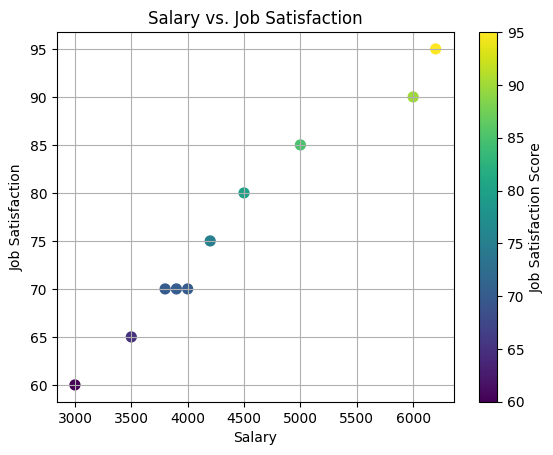

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

x=[3000,4200,4000,5000,6000,3800,3500,6200,3900,4500]
y=[60,75,70,85,90,70,65,95,70,80]

data = { 'x': x, 'y': y}
df = pd.DataFrame(data)

# Plot with English labels and color
plt.scatter(df['x'], df['y'], c=df['y'], cmap='viridis', s=50) # 'c' for color based on 'y', 'cmap' for colormap, 's' for marker size
plt.title('Salary vs. Job Satisfaction')
plt.xlabel('Salary')
plt.ylabel('Job Satisfaction')
plt.grid(True)
plt.colorbar(label='Job Satisfaction Score')
plt.show()

In [ ]:
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

fit = ols('y ~ x', data=df).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     271.0
Date:                Wed, 28 Jan 2026   Prob (F-statistic):           1.87e-07
Time:                        01:36:52   Log-Likelihood:                -20.111
No. Observations:                  10   AIC:                             44.22
Df Residuals:                       8   BIC:                             44.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.0004      2.926      9.913      0.0

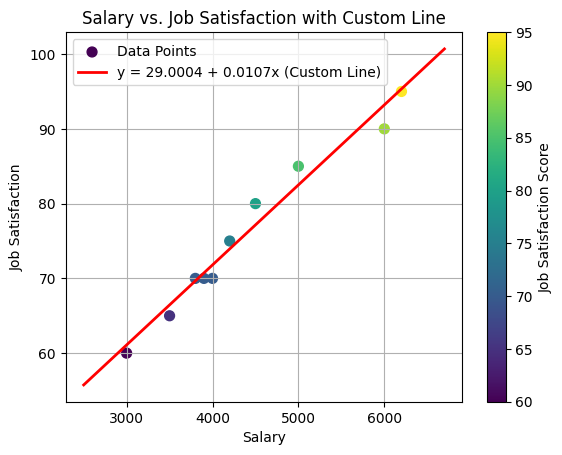

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df['x'], df['y'], c=df['y'], cmap='viridis', s=50, label='Data Points')


x_min_val = df['x'].min()
x_max_val = df['x'].max()
x_for_line = np.linspace(x_min_val - 500, x_max_val + 500, 100)
y_for_line = 29.0004 + 0.0107 * x_for_line

# Plot the custom regression line
plt.plot(x_for_line, y_for_line, color='red', linestyle='-', linewidth=2, label='y = 29.0004 + 0.0107x (Custom Line)')

plt.title('Salary vs. Job Satisfaction with Custom Line')
plt.xlabel('Salary')
plt.ylabel('Job Satisfaction')
plt.grid(True)
plt.colorbar(label='Job Satisfaction Score')
plt.legend()
plt.show()

#직장 만족도의 요인 분석(다중 선형 회귀분석)

In [ ]:
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

salary=[3000,4200,4000,5000,6000,3800,3500,6200,3900,4500]
breakTime = [120,60,100,100,50,120,90,40,120,120]
workingTime = [8,6,10,8,10,10,9,7,8,9]
companySatisfaction=[60,75,70,85,90,70,65,95,70,80]

data = {'salary': salary, 'companySatisfaction': companySatisfaction, 'breakTime': breakTime, 'workingTime': workingTime}
df = pd.DataFrame(data)

fit = ols('companySatisfaction ~ salary + breakTime + workingTime', data=df).fit()
print(fit.summary())



                             OLS Regression Results                            
Dep. Variable:     companySatisfaction   R-squared:                       0.988
Model:                             OLS   Adj. R-squared:                  0.982
Method:                  Least Squares   F-statistic:                     164.0
Date:                 Wed, 28 Jan 2026   Prob (F-statistic):           3.81e-06
Time:                         02:07:12   Log-Likelihood:                -15.777
No. Observations:                   10   AIC:                             39.55
Df Residuals:                        6   BIC:                             40.77
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      24.9819      5.353      4

#로지스틱 회귀분석

In [ ]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

sales = [1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0]
price = [1500,2000,5000,3000,3500,2500,4000,4500,3000,4500,4000,4500,5500,6500,5000,3500,7000]

if len(sales) != len(price):
  print('Error '* 10)
else:
  print('|'*10 + 'Success' + '|'*10)

data = {'sales': sales, 'price': price}
df = pd.DataFrame(data)

logis = sm.Logit.from_formula('sales ~ price', data=df).fit()
print(logis.summary())
print('OR')
print(np.exp(logis.params))

||||||||||Success||||||||||
Optimization terminated successfully.
         Current function value: 0.430873
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  sales   No. Observations:                   17
Model:                          Logit   Df Residuals:                       15
Method:                           MLE   Df Model:                            1
Date:                Wed, 28 Jan 2026   Pseudo R-squ.:                  0.3768
Time:                        02:25:28   Log-Likelihood:                -7.3248
converged:                       True   LL-Null:                       -11.754
Covariance Type:            nonrobust   LLR p-value:                  0.002917
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5752      3.300      1.993      0.046       0.108      13.042
p

#타이타닉 탑승자 생존여부 예측

In [ ]:
import seaborn as sns

titanic = sns.load_dataset('titanic')
print(titanic)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

In [ ]:
import statsmodels.api as sm
import numpy as np
from sklearn.preprocessing import LabelEncoder

Encoder = LabelEncoder()
Encoder.fit(titanic['sex'])
sex = Encoder.transform(titanic['sex'])
titanic['sex'] = sex

model = sm.Logit.from_formula('survived ~ pclass + sex + age + fare + parch + sibsp', data=titanic).fit()
print(model.summary())
print('OR')
print(np.exp(model.params))

Optimization terminated successfully.
         Current function value: 0.445244
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      707
Method:                           MLE   Df Model:                            6
Date:                Wed, 28 Jan 2026   Pseudo R-squ.:                  0.3408
Time:                        02:32:43   Log-Likelihood:                -317.90
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                 5.727e-68
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3890      0.604      8.926      0.000       4.206       6.572
pclass        -1.2422      0.

#자동차 연비 예측하기

In [ ]:
!pip install scikit-learn

import numpy as np
import pandas as pd

data_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/auto-mpg.csv', header=0, engine='python')
print('데이터셋 크기: ', data_df.shape)
data_df.head()

데이터셋 크기:  (398, 9)


,mpg,cylinders,displacen,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
data_df = data_df.drop(['car_name','origin','horsepower'], axis=1, inplace=False)
data_df.head()

,mpg,cylinders,displacen,weight,acceleration,model_year
0,18.0,8,307.0,3504,12.0,70
1,15.0,8,350.0,3693,11.5,70
2,18.0,8,318.0,3436,11.0,70
3,16.0,8,304.0,3433,12.0,70
4,17.0,8,302.0,3449,10.5,70


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacen     398 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 18.8 KB


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Y = data_df['mpg']
X = data_df.drop(['mpg'], axis=1, inplace=False)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

lr = LinearRegression()
lr.fit(X_train.values, Y_train.values)
Y_pred = lr.predict(X_test.values)

mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
print('MSE: {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R^2 (Variance core) : {0:.3f}'.format(r2_score(Y_test, Y_pred)))
print('Y 절편 값: ', np.round(lr.intercept_, 2))
print('회귀 계수 값: ', np.round(lr.coef_,2))



MSE: 12.278, RMSE : 3.504
R^2 (Variance core) : 0.808
Y 절편 값:  -17.55
회귀 계수 값:  [-0.14  0.01 -0.01  0.2   0.76]


In [39]:
coef = pd.Series(data=np.round(lr.coef_,2), index=X.columns)
coef.sort_values(ascending=False)

,0
model_year,0.76
acceleration,0.20
displacen,0.01
weight,-0.01
cylinders,-0.14


In [47]:
print("연비르 예측하고 싶은 차의 정보를 입력해주세요.")
cylinders = int(input("실린더 개수: "))
displacement = int(input("배기량: "))
weight = int(input("차중: "))
acceleration = int(input("가속능력: "))
model_year = int(input("출시년도: "))

mpg_predict = lr.predict([[cylinders, displacement, weight, acceleration, model_year]])
print("예상 연비: ", np.round(mpg_predict[0],2))

연비르 예측하고 싶은 차의 정보를 입력해주세요.
실린더 개수: 1
배기량: 1
차중: 1
가속능력: 1
출시년도: 1
예상 연비:  -16.73
